## Advertiser
This is a ML project which uses regressor model to predict sales of a business based on the investment made in advertisements.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

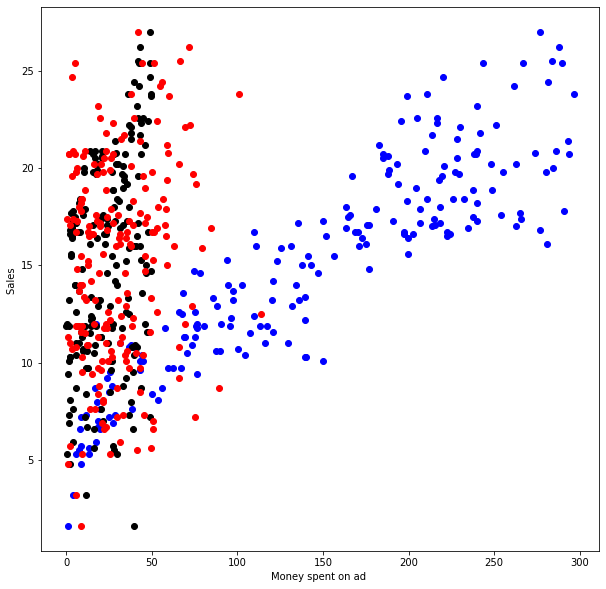

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(df["TV"], df["Sales"], c='blue')
plt.scatter(df["Radio"], df["Sales"], c='black')
plt.scatter(df["Newspaper"], df["Sales"], c='red')
plt.xlabel("Money spent on ad ")
plt.ylabel("Sales ")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score

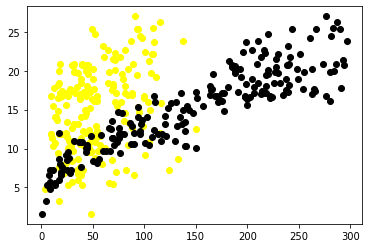

In [8]:
df["R-N"] = df["Radio"] + df["Newspaper"]
plt.scatter(df["R-N"], df["Sales"], c='yellow')
plt.scatter(df["TV"], df["Sales"], c='black')
plt.show()

In [9]:
to_drop = ['Sales','Radio','Newspaper']
X = df.drop(to_drop, axis=1)
y = df['Sales']

In [10]:
X.head()

,TV,R-N
0,230.1,107.0
1,44.5,84.4
2,17.2,115.2
3,151.5,99.8
4,180.8,69.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [12]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [13]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

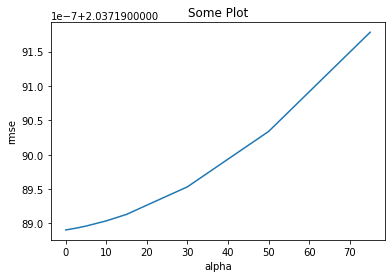

In [14]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Some Plot")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [15]:
rmse_cv(RidgeCV(alphas=[0.00001, 0.0001, 0.001])).mean()

2.0371988550212725

In [16]:
cv_ridge.min()

2.0371988905474963

In [17]:
model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.005, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()

2.0377307067650614

In [18]:
alphas = [0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

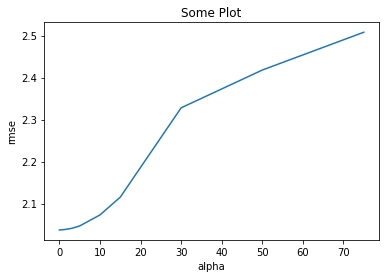

In [19]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Some Plot")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [20]:
cv_lasso.min()

2.037199089451342

In [21]:
model0 = LinearRegression()
model1 = LassoCV(alphas=[0.5, 0.05, 0.01, 0.005, 0.001, 0.0005])
model2 = RidgeCV(alphas=[0.00001, 0.0001, 0.001])

model3 = Lasso(alpha=0.001)
model4 = Ridge(0.005)

In [22]:
model0.fit(X_train, y_train)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

Ridge(alpha=0.005)

In [23]:
ypred0 = model0.predict(X_test)

ypred1 = model1.predict(X_test)
ypred2 = model2.predict(X_test)

ypred3 = model3.predict(X_test)
ypred4 = model4.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
print("R2 for model0")
r2_score(y_test, ypred0)

R2 for model0


0.9069553741005161

In [26]:
print("R2 for model1")
r2_score(y_test, ypred1)

R2 for model1


0.9069555939023743

In [27]:
print("R2 for model2")
r2_score(y_test, ypred2)

R2 for model2


0.9069554160407416

In [28]:
print("R2 for model3")
r2_score(y_test, ypred3)

R2 for model3


0.906955813638062

In [29]:
print("R2 for model4")
r2_score(y_test, ypred4)

R2 for model4


0.90695537482355

In [30]:
import os
import pickle
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/model3.sav"
pickle.dump(model3, open(MODEL_PATH, 'wb'))